In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('/content/feature_engineering.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
y = df.diagnosis
x = df.drop(['id','diagnosis','Unnamed: 32'], axis = 1)

In [47]:
df.drop('Unnamed: 32', axis=1, inplace=True)


In [48]:
def create_pca_df(x,y):
  x = StandardScaler().fit_transform(x)
  pca = PCA(n_components = 2)
  pca_fit = pca.fit_transform(x)
  pca_df = pd.DataFrame(data = pca_fit , columns = ['PC1','PC2'])
  final_df = pd.concat([pca_df,pd.DataFrame(y)],axis =1)
  return final_df
pca_df = create_pca_df(x,y)

In [49]:
pca_df.head()

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M


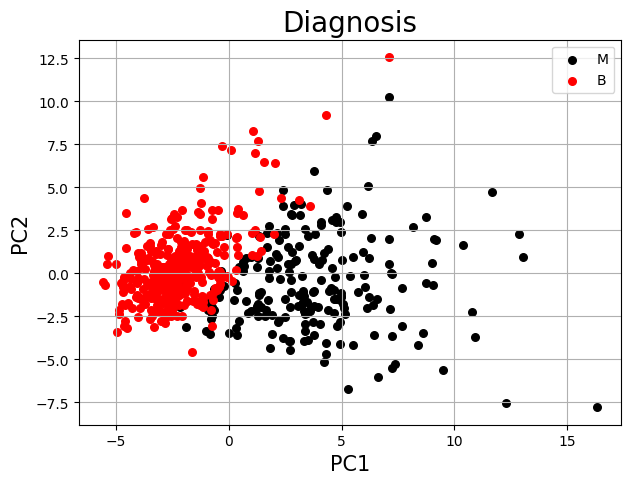

In [50]:
def plot_pca(dataframe, target):
  fig = plt.figure(figsize = (7,5))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('PC1',fontsize = 15)
  ax.set_ylabel('PC2',fontsize = 15)
  ax.set_title(f'{target.capitalize()}', fontsize=20)

  targets = list(dataframe[target].unique())
  colors = ['Black','Red']

  for t,color in zip (targets,colors):
    indices = dataframe[target] == t
    ax.scatter(dataframe.loc[indices,'PC1'], dataframe.loc[indices,'PC2'], c = color , s=30)

  ax.legend(targets)
  ax.grid()
  plt.show()
plot_pca(pca_df,'diagnosis')

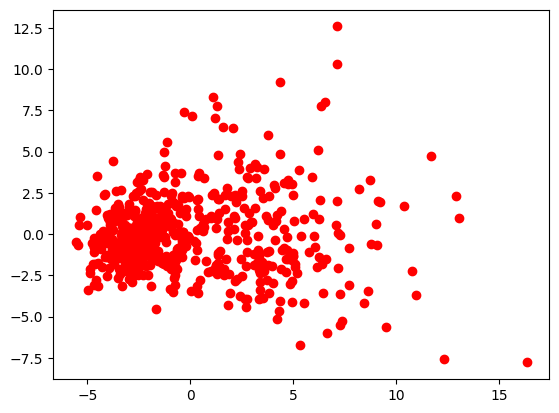

In [51]:
plt.scatter(pca_df['PC1'],pca_df['PC2'],color = 'red')

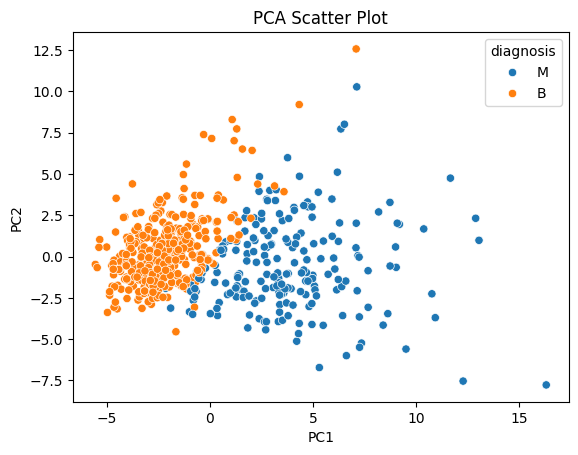

In [52]:
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='diagnosis')
plt.title('PCA Scatter Plot')
plt.show()

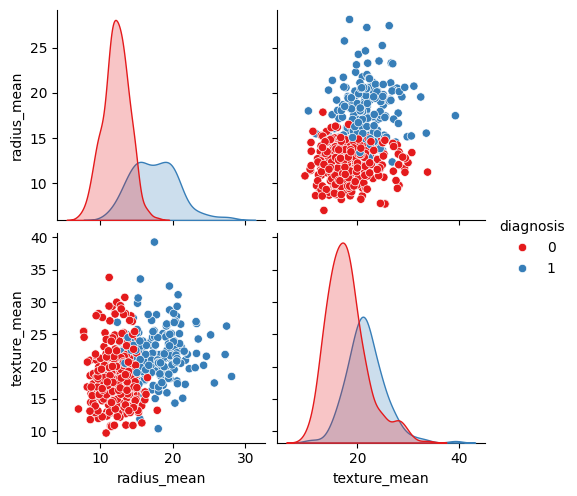

In [53]:
subset_df = df[['radius_mean', 'texture_mean', 'diagnosis']]

# Create pairplot
sns.pairplot(data=subset_df, hue='diagnosis', palette='Set1')
plt.show()


In [54]:
label = LabelEncoder()
df['diagnosis'] = label.fit_transform(df['diagnosis'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [55]:
correlation_values = df.corr(numeric_only=True)['diagnosis'].sort_values(ascending=False)
correlation_values

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


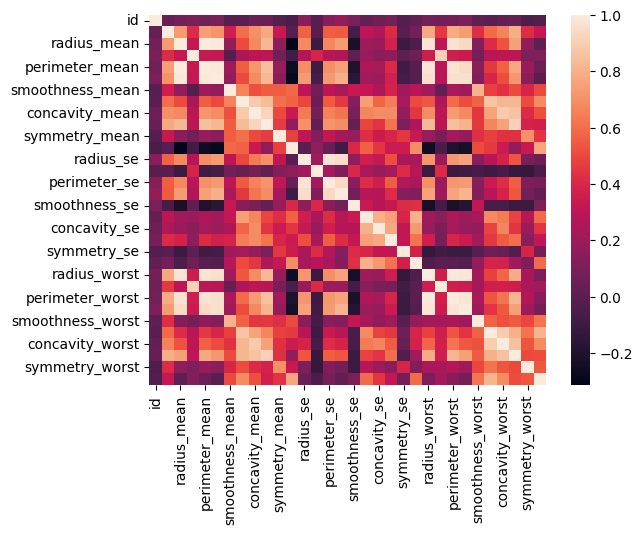

In [57]:
sns.heatmap(df.corr())
plt.show()

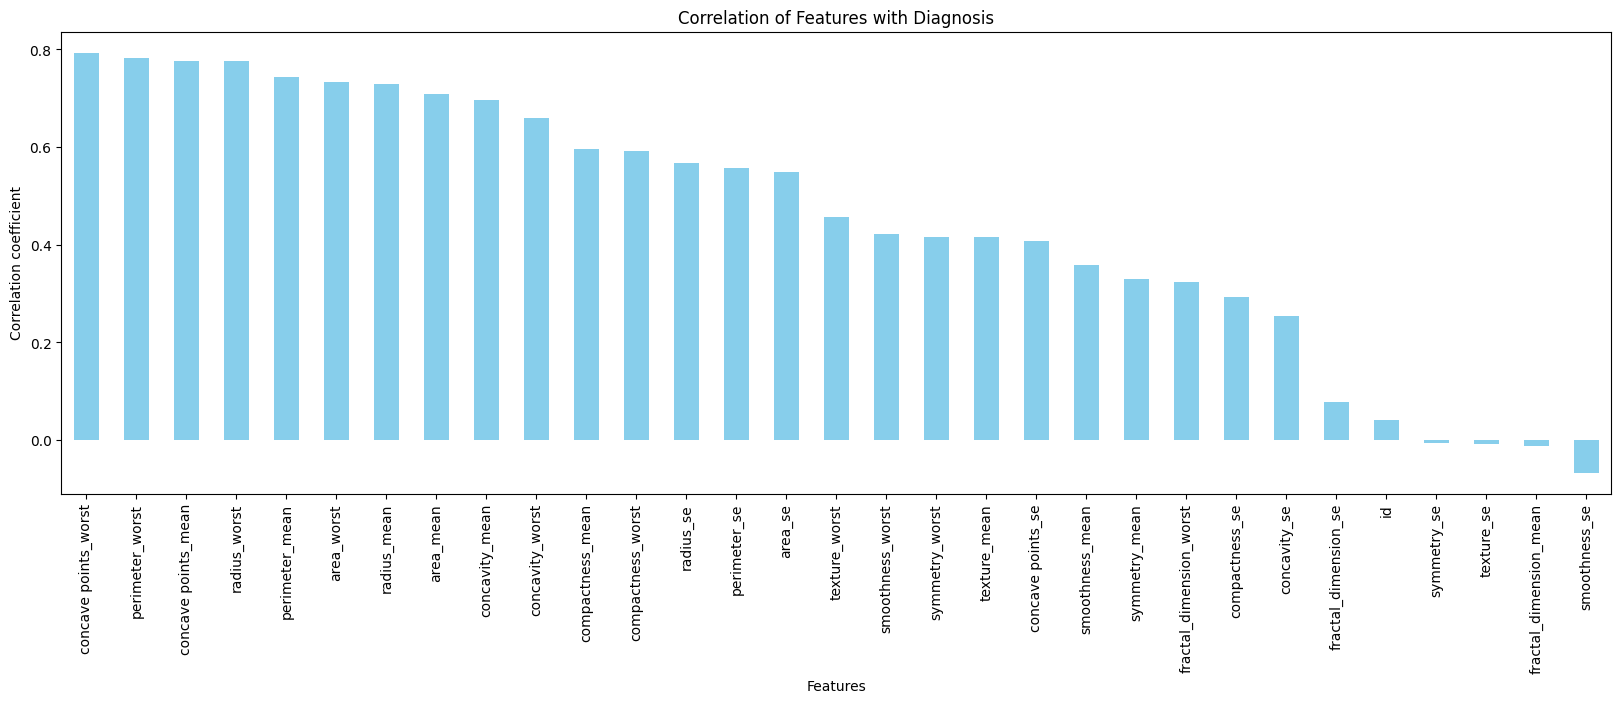

In [58]:
plt.figure(figsize=(20, 6))
correlation_values.drop('diagnosis').plot(kind='bar', color='skyblue')

plt.title('Correlation of Features with Diagnosis')
plt.ylabel('Correlation coefficient')
plt.xlabel('Features')

plt.show()